# Analysis Package for Athena

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import h5py

%cd /home/vikrammanikantan/code/athena/vis/python

import athena_read

data_dir = "/home/vikrammanikantan/code/runs/TOR128/"
#data_dir = "/home/vik/code/runs/athena_torus/"


/home/vikrammanikantan/code/athena/vis/python


## Choose Time

In [5]:
dump = '00367'

file_user = "fm_torus.user." + dump + ".athdf"
file_prim = "fm_torus.prim." + dump + ".athdf"

## Read in Data

In [6]:
user = athena_read.athdf(data_dir+file_user)
prim = athena_read.athdf(data_dir+file_prim)
hst = athena_read.hst(data_dir+'fm_torus.hst')

## Data Reduction

In [7]:
def dump_keys(d, lvl=0):
    import collections.abc
    for k in d.keys():
        if not isinstance(d[k], dict):
            if isinstance(d[k], np.ndarray):
                print(k + ": " + str(type(d[k])) + str(d[k].shape))
            else:
                print(k + ": " + str(type(d[k])))
                
        else:
            dump_keys(d[k])
    return

## Defining the Variables

In [8]:
a = 0.5
M = 1
q = 0
rh = M + np.sqrt(M**2 - a**2 - q**2)

In [9]:
rho = prim['rho']
xf = prim['x1f']
xv = prim['x1v']
yf = prim['x2f']
yv = prim['x2v']
zf = prim['x3f']

## Coordinates

In [10]:
# defining number of cells in each spatial coordinate
n1 = user['RootGridSize'][0]
n2 = user['RootGridSize'][1]
n3 = user['RootGridSize'][2]

# creating 1D arrays fo r
r_  = prim['x1v']
th_ = prim['x2v']
ph_ = prim['x3v']

r = np.zeros((n3,n2,n1))
th = np.zeros((n3,n2,n1))
ph = np.zeros((n3,n2,n1))

rmax = r_[-1]
rmin = r_[0]

for j in range(n2):
    for k in range(n3):
        r[k,j,:] = r_
        
for i in range(n1):
    for k in range(n3):
        th[k,:,i] = th_     

for i in range(n1):
    for j in range(n2):
        ph[:,j,i] = ph_

x = r[0,:,:]*np.sin(th[0,:,:])
z = r[0,:,:]*np.cos(th[0,:,:])

## Plotting

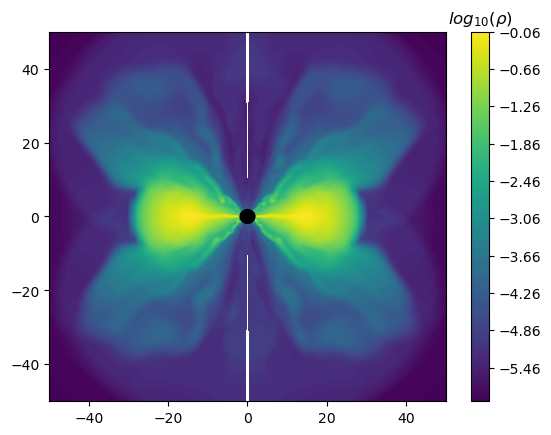

In [15]:
logrho = np.log10(rho)

fig, ax = plt.subplots()
right = ax.contourf(x,z, logrho[0,:,:], levels = 100)
left = ax.contourf(-x,z, logrho[n3//2,:,:], levels = 100)

ax.set_xlim(-50,50)
ax.set_ylim(-50,50)

cbar = fig.colorbar(left, extend='both')
cbar.ax.set_title(r'$log_{10}(\rho)$')

circle1 = plt.Circle((0, 0), rh, color ='black')
ax.add_patch(circle1)

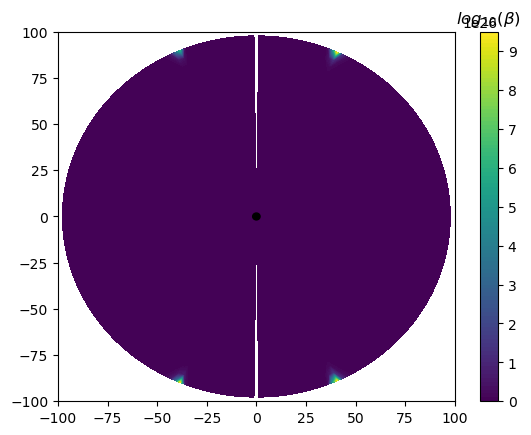

In [14]:
pgas = prim['press']
pmag = user['pmag']
beta = pgas/pmag
logbeta = np.log10(beta)

  

logbeta = np.nan_to_num(logbeta, nan=1)


fig, ax = plt.subplots()
right = ax.contourf(x,z, beta[0,:,:], levels = 100)
ax.contourf(-x,z, beta[n3//2,:,:], levels = 100)

ax.set_xlim(-100,100)
ax.set_ylim(-100,100)

cbar = plt.colorbar(right,cmap='PuOr', extend='both')
cbar.ax.set_title(r'$log_{10}(\beta)$')

circle1 = plt.Circle((0, 0), rh, color ='black')
ax.add_patch(circle1)

## Making a Movie

In [ ]:
a = 0.5
M = 1
q = 0
rh = M + np.sqrt(M**2 - a**2 - q**2)


def mkmovie(sim_path, var, start, end, dir_save):
    
    s1 = f'{start:05d}'
    
    file_user = "fm_torus.user." + s1 + ".athdf"
    file_prim = "fm_torus.prim." + s1 + ".athdf"

    user = athena_read.athdf(data_dir+file_user)
    prim = athena_read.athdf(data_dir+file_prim)
    
    r,th,ph = get_plot_coordinates(sim_path, start)
    
    x = r[0,:,:]*np.sin(th[0,:,:])
    z = r[0,:,:]*np.cos(th[0,:,:])
    
    for dump in range(start, end):
        
        d = f'{dump:05d}'

        file_user = "fm_torus.user." + d + ".athdf"
        file_prim = "fm_torus.prim." + d + ".athdf"

        user = athena_read.athdf(data_dir+file_user)
        prim = athena_read.athdf(data_dir+file_prim)
        
        

In [ ]:
def get_plot_coordinates(sim_path, dump):
    
    d = f'{dump:05d}'
    
    file_user = "fm_torus.user." + d + ".athdf"
    file_prim = "fm_torus.prim." + d + ".athdf"

    user = athena_read.athdf(data_dir+file_user)
    prim = athena_read.athdf(data_dir+file_prim)
    
    xf = prim['x1f']
    xv = prim['x1v']
    yf = prim['x2f']
    yv = prim['x2v']
    zf = prim['x3f']
    
    # defining number of cells in each spatial coordinate
    n1 = user['RootGridSize'][0]
    n2 = user['RootGridSize'][1]
    n3 = user['RootGridSize'][2]

    # creating 1D arrays fo r
    r_  = prim['x1v']
    th_ = prim['x2v']
    ph_ = prim['x3v']

    r = np.zeros((n3,n2,n1))
    th = np.zeros((n3,n2,n1))
    ph = np.zeros((n3,n2,n1))

    rmax = r_[-1]
    rmin = r_[0]

    for j in range(n2):
        for k in range(n3):
            r[k,j,:] = r_

    for i in range(n1):
        for k in range(n3):
            th[k,:,i] = th_     

    for i in range(n1):
        for j in range(n2):
            ph[:,j,i] = ph_

    x = r[0,:,:]*np.sin(th[0,:,:])
    z = r[0,:,:]*np.cos(th[0,:,:])
    
    return r,th,ph